In [117]:
import os

In [2]:
import numpy as np
import pandas as pd 
data=pd.read_csv("Admission_Predict.csv")
data.head()

C:\Users\apex computers\AppData\Local\Temp\ipykernel_16624\2061018038.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [119]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Select columns to standardize
columns_to_standardize = ['GRE Score', 'TOEFL Score']

# Fit and transform the selected columns
data[columns_to_standardize] = scaler.fit_transform(data[columns_to_standardize])

# Print the updated DataFrame
data


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,1.762107,1.746971,4,4.5,4.5,9.65,1,0.92
1,2,0.627656,-0.067635,4,4.0,4.5,8.87,1,0.76
2,3,-0.070467,-0.562528,3,3.0,3.5,8.00,1,0.72
3,4,0.453126,0.427257,3,3.5,2.5,8.67,1,0.80
4,5,-0.244998,-0.727492,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,0.627656,0.427257,3,3.5,3.5,9.04,1,0.82
396,397,0.714922,-0.067635,3,3.0,3.5,9.11,1,0.84
397,398,1.151249,1.417042,4,5.0,4.5,9.45,1,0.91
398,399,-0.419528,-0.727492,3,3.5,4.0,8.78,0,0.67


In [59]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [60]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

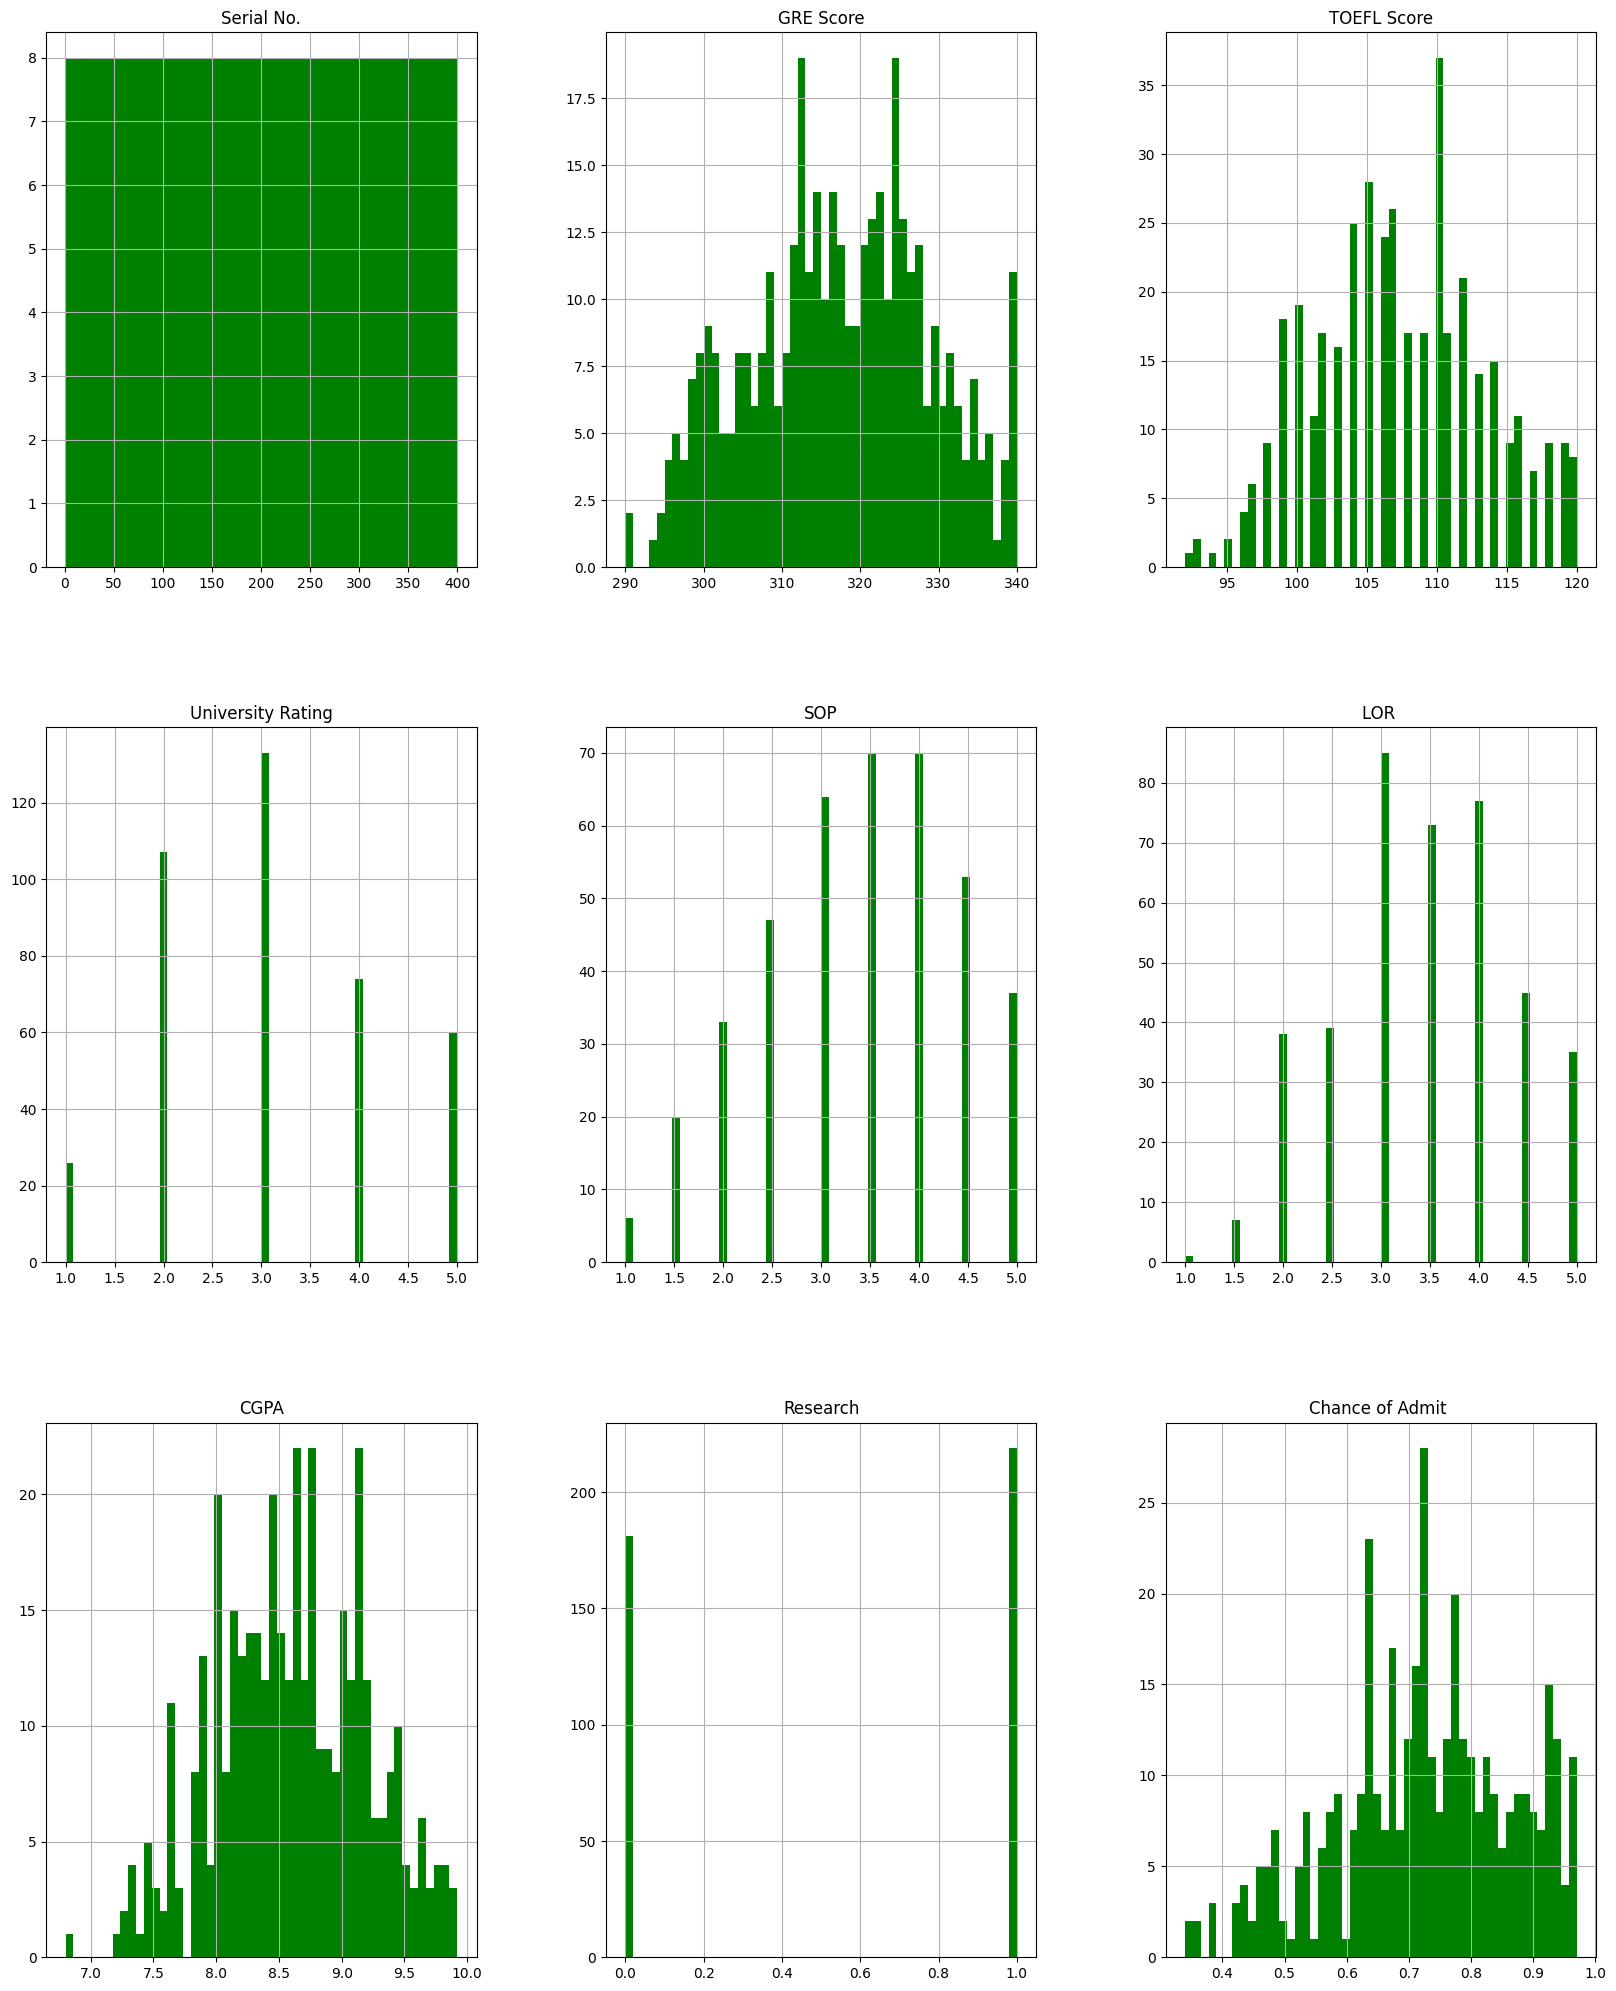

In [61]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,25), color='green')
plt.show()

In [78]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

def log_transform(x):
    print(x)
    return np.log(x + 1)


scaler = StandardScaler()
transformer = FunctionTransformer(log_transform)

transformer.fit(x_train, y_train)
transformer .fit(x_test, y_test)


FunctionTransformer(func=<function log_transform at 0x00000262B4C43E20>)

In [121]:
x=data.drop(['Chance of Admit '],axis=1)
y=data['Chance of Admit ']

In [122]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y ,test_size=0.2, random_state=0)


In [123]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)



(320, 8)
(80, 8)
(320,)
(80,)


In [124]:
from sklearn.linear_model import ElasticNet
lr=ElasticNet(alpha=0.1,l1_ratio=0.5,random_state=42)
lr.fit(x_train,y_train)



ElasticNet(alpha=0.1, random_state=42)

In [125]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [126]:
def eval_metrics(actual, pred):
    rmse=np.sqrt(mean_squared_error(actual,pred))
    mae=mean_absolute_error(actual,pred)
    r2=r2_score(actual,pred)

    return rmse ,mae, r2

In [127]:
predicted_value=lr.predict(x_test)
predicted_value

array([0.73278506, 0.74374093, 0.77624327, 0.66012812, 0.71996297,
       0.63628262, 0.70801131, 0.70737183, 0.76659823, 0.81864251,
       0.59755214, 0.82632608, 0.70456051, 0.62686559, 0.76861876,
       0.6536768 , 0.64579301, 0.73432516, 0.67009354, 0.71087793,
       0.81365655, 0.80242092, 0.68724186, 0.6213046 , 0.76391606,
       0.67050762, 0.58618262, 0.68365258, 0.86975071, 0.67393759,
       0.66246031, 0.75371646, 0.74990767, 0.6172877 , 0.76688012,
       0.75003103, 0.68399875, 0.77823765, 0.67614125, 0.84888171,
       0.72401281, 0.70589963, 0.71454708, 0.7408924 , 0.78222784,
       0.72671939, 0.7098221 , 0.73370265, 0.65803871, 0.64455938,
       0.67848948, 0.72905999, 0.69047107, 0.84582435, 0.70111642,
       0.77031112, 0.80306916, 0.71794219, 0.7683447 , 0.77377828,
       0.69436546, 0.58184135, 0.65222556, 0.63429874, 0.79595894,
       0.77438026, 0.71756171, 0.80641849, 0.74571073, 0.73712886,
       0.62930224, 0.81085882, 0.71399627, 0.68434186, 0.82489

In [131]:
(rmse, mae, r2)=eval_metrics(y_test,predicted_value)

In [133]:
print("rmse =",rmse)
print("mae =",mae)
print("r2_score =",r2)

rmse = 0.08849324931022569
mae = 0.06522893536930878
r2_score = 0.5689521448408148
